<a href="https://colab.research.google.com/github/nimalan-parameswaran/SmartBio-Air/blob/main/Data/Data_Preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
normal1 = pd.read_csv("/content/Normal1_data.csv")
normal2 = pd.read_csv("/content/Normal2_data.csv")
fault   = pd.read_csv("/content/Fault_data.csv")

normal1["label"] = "normal"
normal2["label"] = "normal"
fault["label"]   = "fault"

In [94]:
normal = pd.concat([normal1, normal2], ignore_index=True)

print("Normal samples:", normal.shape)
print("Fault samples:", fault.shape)

Normal samples: (4000, 8)
Fault samples: (4000, 8)


In [95]:
print(normal.isna().sum())

timestamp    0
accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
label        0
dtype: int64


In [96]:
print(fault.isna().sum())

timestamp    0
accX         0
accY         0
accZ         0
gyroX        0
gyroY        0
gyroZ        0
label        0
dtype: int64


In [97]:
features = ["accX", "accY", "accZ", "gyroX", "gyroY", "gyroZ"]

normal_data = normal[features + ["label"]]
fault_data  = fault[features + ["label"]]

normal_data_copy = normal_data.copy()
fault_data_copy  = fault_data.copy()

In [98]:
stats = pd.concat([
    normal_data.describe().assign(class_type="normal"),
    fault_data.describe().assign(class_type="fault")
])

stats


,accX,accY,accZ,gyroX,gyroY,gyroZ,class_type
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,normal
mean,1.288483,0.122844,10.626904,-1.717266,3.341468,-2.268506,normal
std,2.508583,1.276521,10.756623,6.418231,90.309731,5.768915,normal
min,-21.634000,-6.292000,-0.153200,-37.384000,-755.729800,-69.747900,normal
25%,-0.086200,-0.138900,-0.076600,-2.441400,-13.886400,-3.356900,normal
50%,-0.009600,-0.062200,17.087450,-1.083400,-6.344600,-1.312300,normal
75%,2.558200,0.307675,21.256900,-0.091600,8.768725,-0.320400,normal
max,33.777400,12.085900,38.671100,33.111600,1024.359300,56.594800,normal
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,fault
mean,0.706546,0.269917,12.232528,-2.867612,9.412682,-3.463263,fault


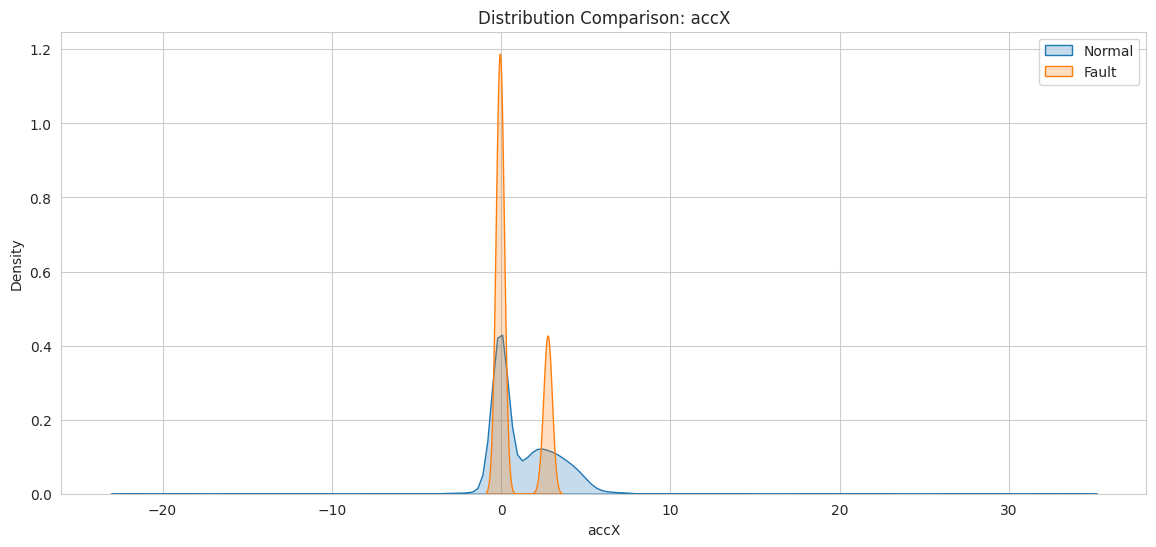

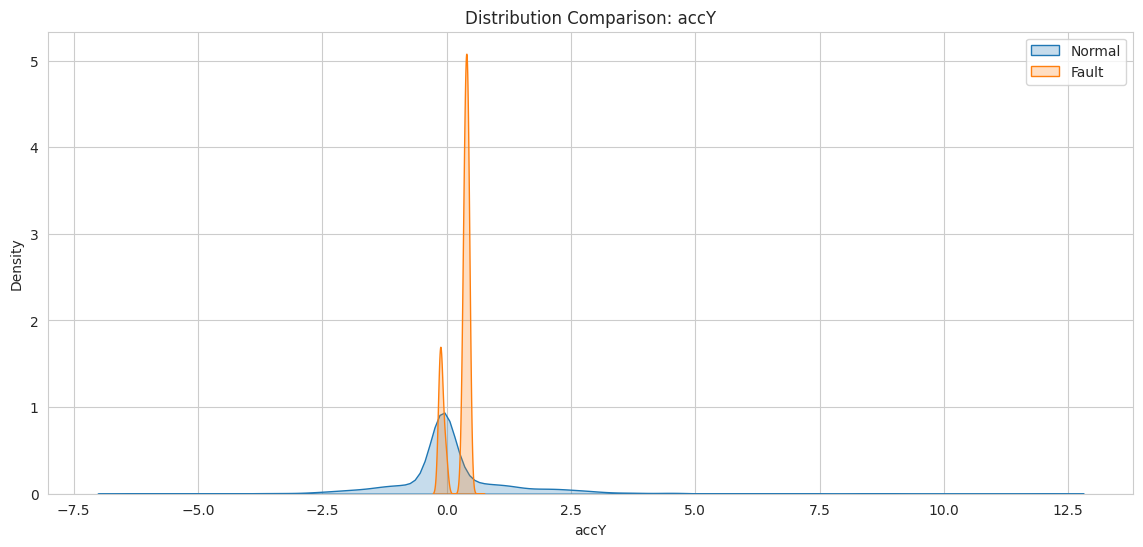

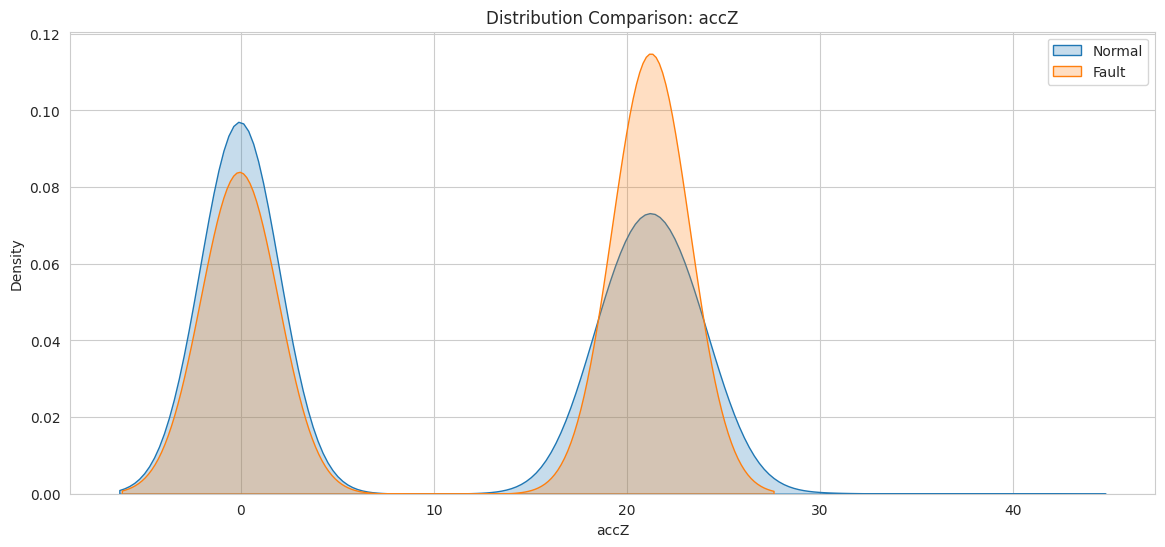

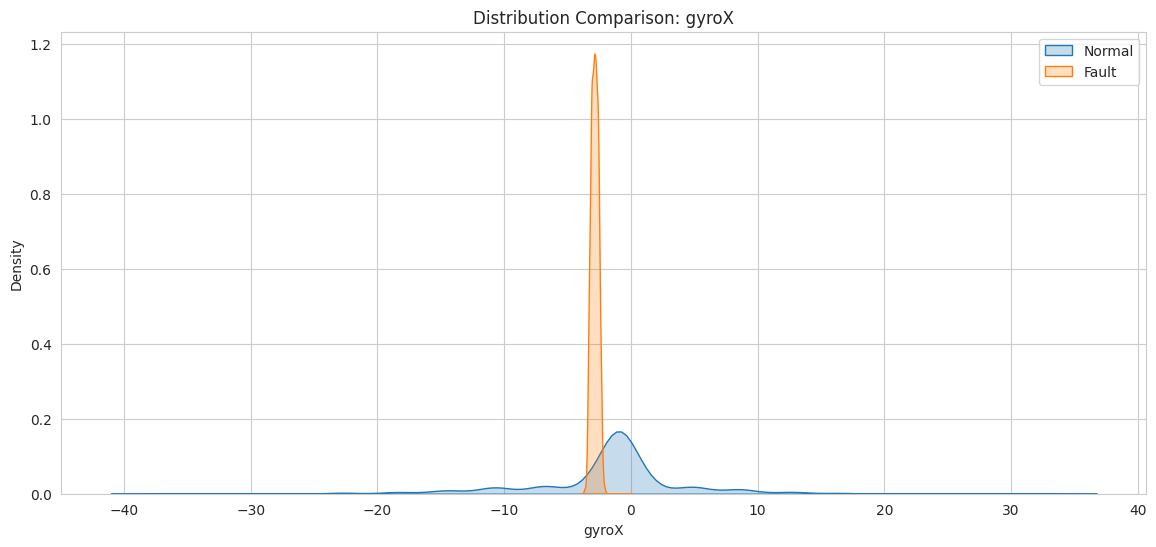

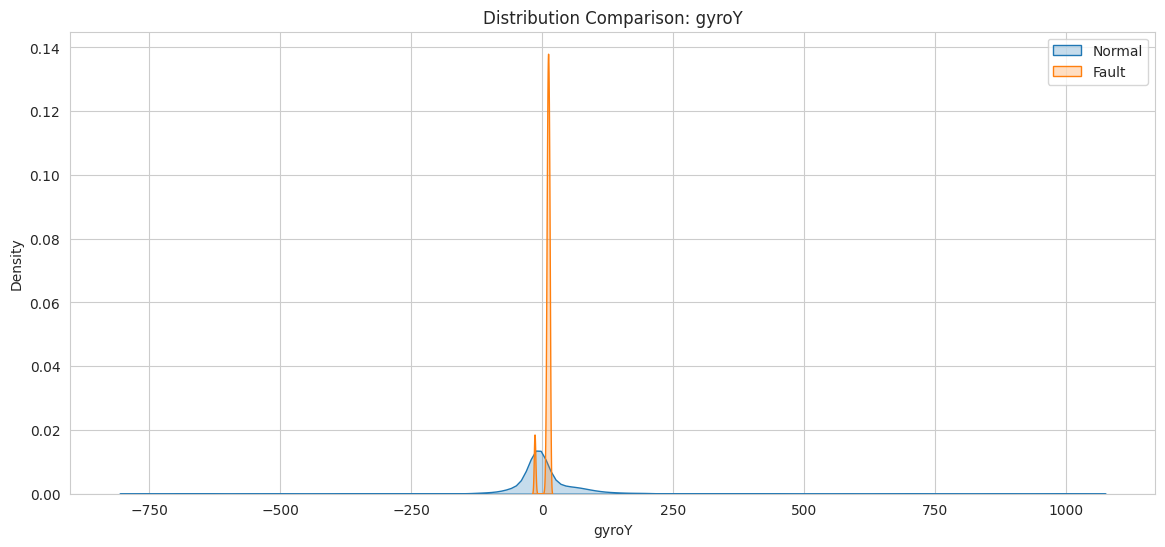

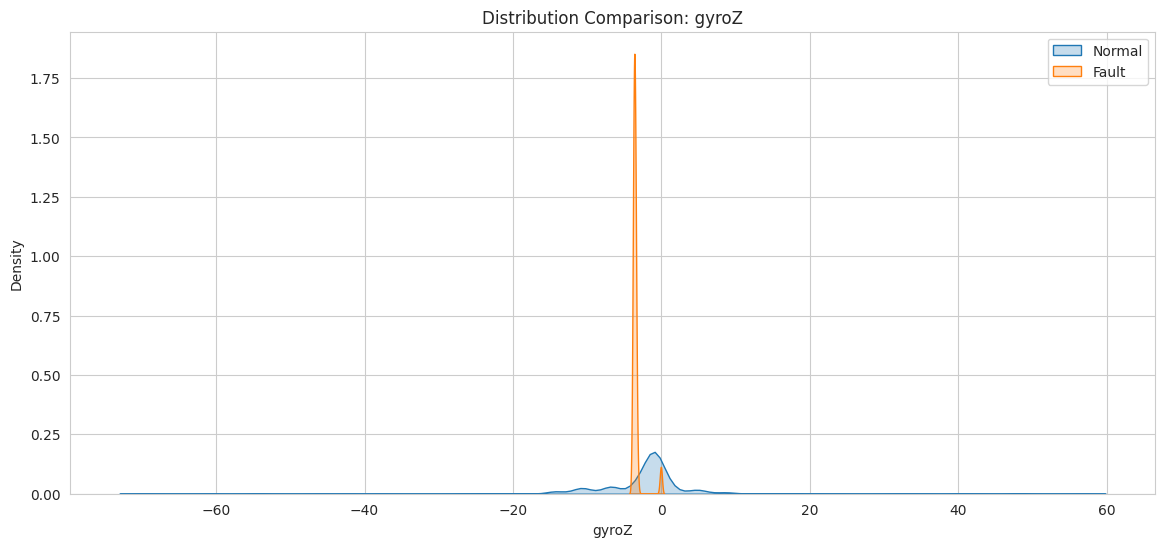

In [99]:
plt.rcParams["figure.figsize"] = (14, 6)
sns.set_style("whitegrid")
for col in features:
    plt.figure()
    sns.kdeplot(normal_data[col], label="Normal", fill=True)
    sns.kdeplot(fault_data[col], label="Fault", fill=True)
    plt.title(f"Distribution Comparison: {col}")
    plt.legend()
    plt.show()


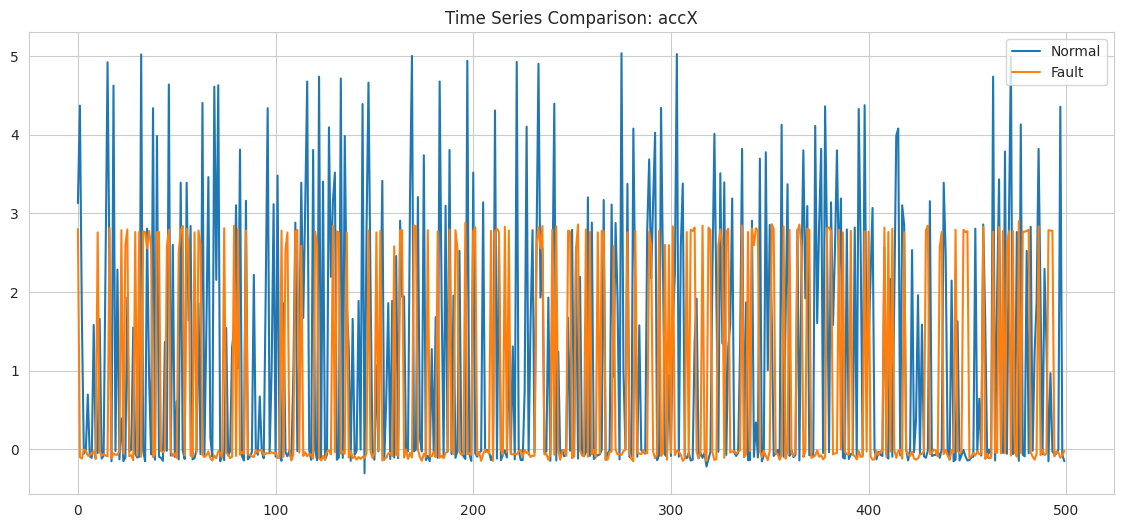

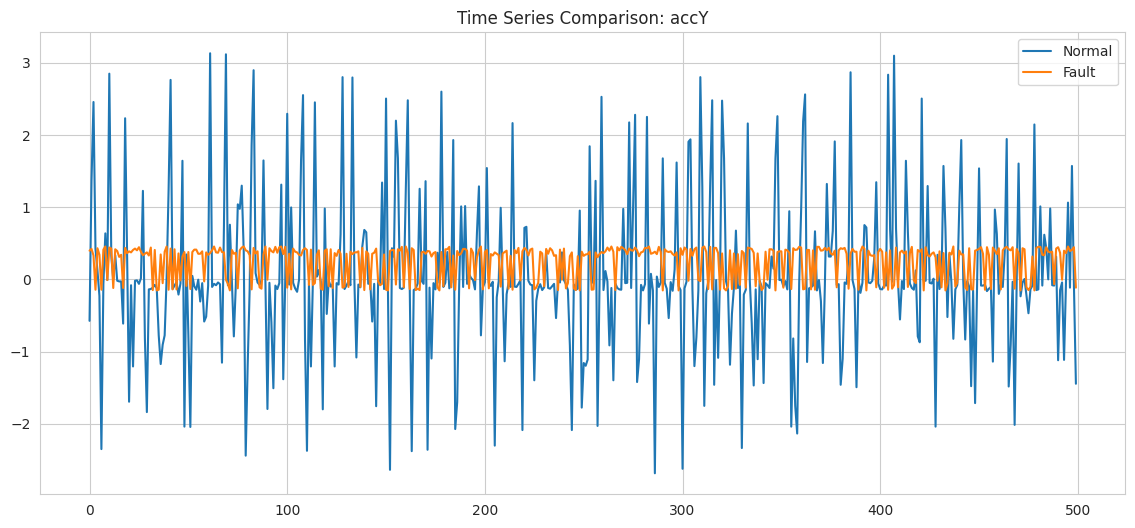

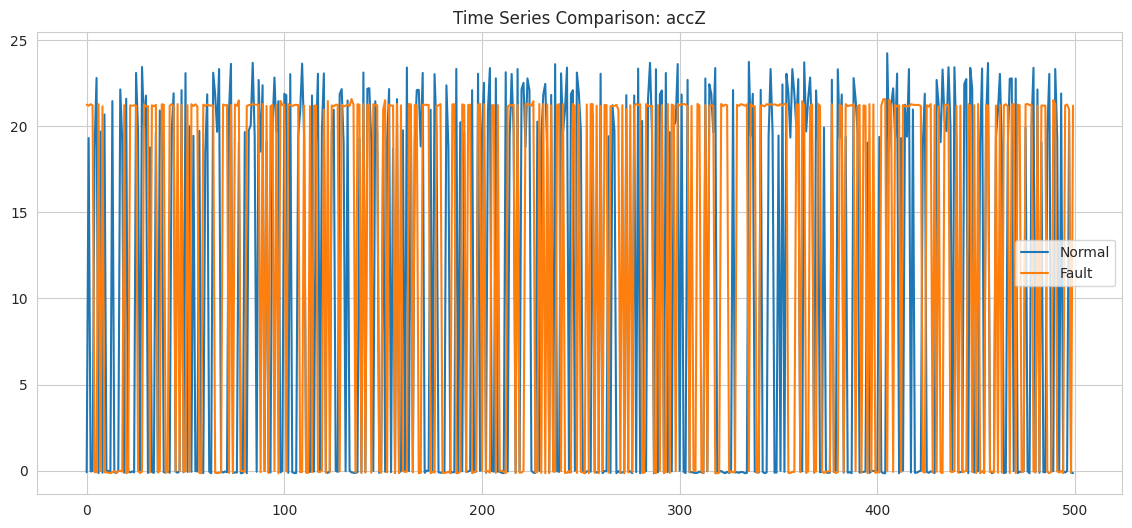

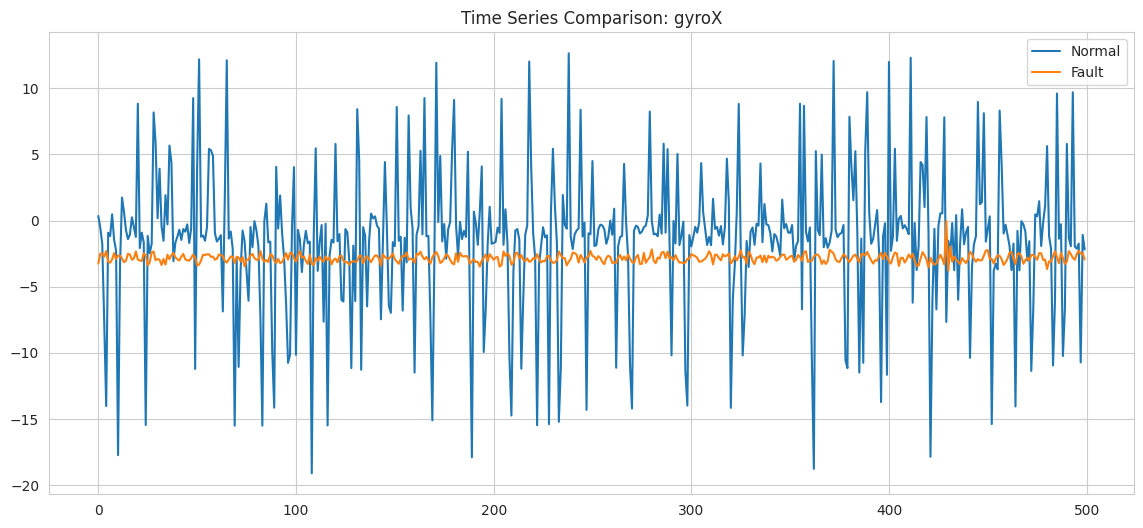

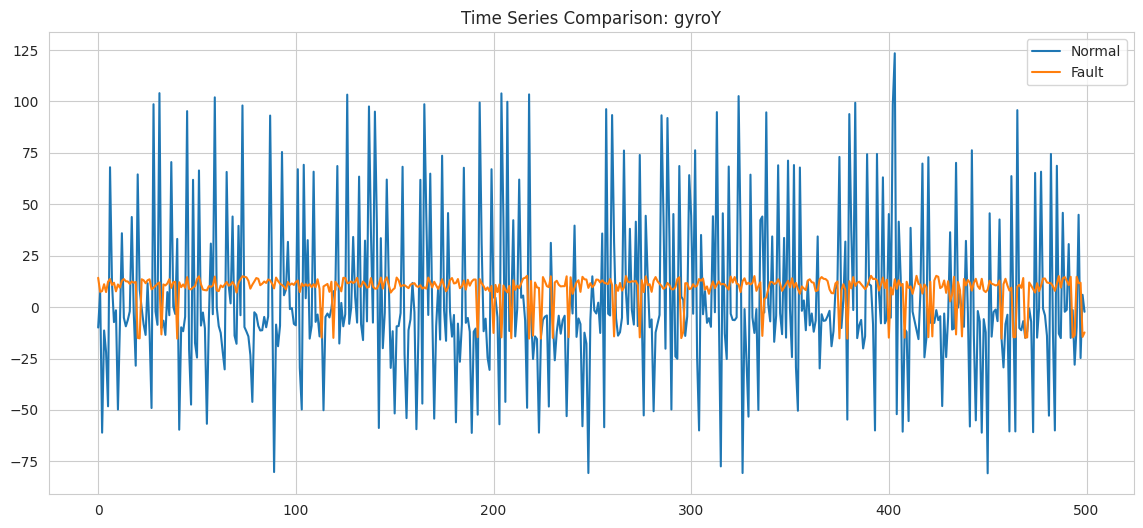

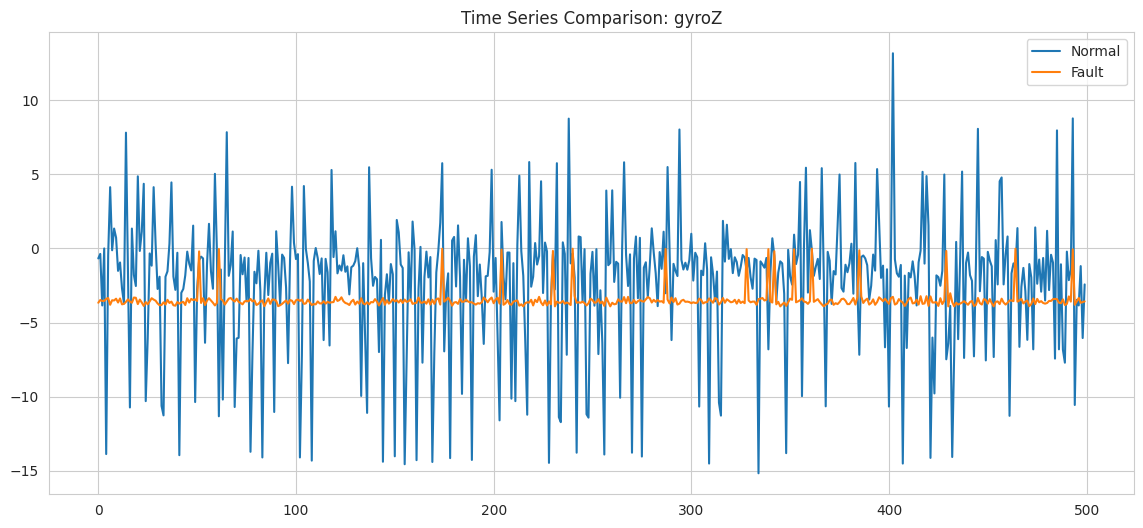

In [100]:
def plot_timeseries(feature):
    plt.plot(normal_data[feature][:500], label="Normal")
    plt.plot(fault_data[feature][:500], label="Fault")
    plt.title(f"Time Series Comparison: {feature}")
    plt.legend()
    plt.show()

for f in features:
    plot_timeseries(f)

In [101]:
def magnitude(df, cols):
    return np.sqrt((df[cols] ** 2).sum(axis=1))

normal_data["acc_mag"]  = magnitude(normal_data, ["accX","accY","accZ"])
fault_data["acc_mag"]   = magnitude(fault_data, ["accX","accY","accZ"])

normal_data["gyro_mag"] = magnitude(normal_data, ["gyroX","gyroY","gyroZ"])
fault_data["gyro_mag"]  = magnitude(fault_data, ["gyroX","gyroY","gyroZ"])

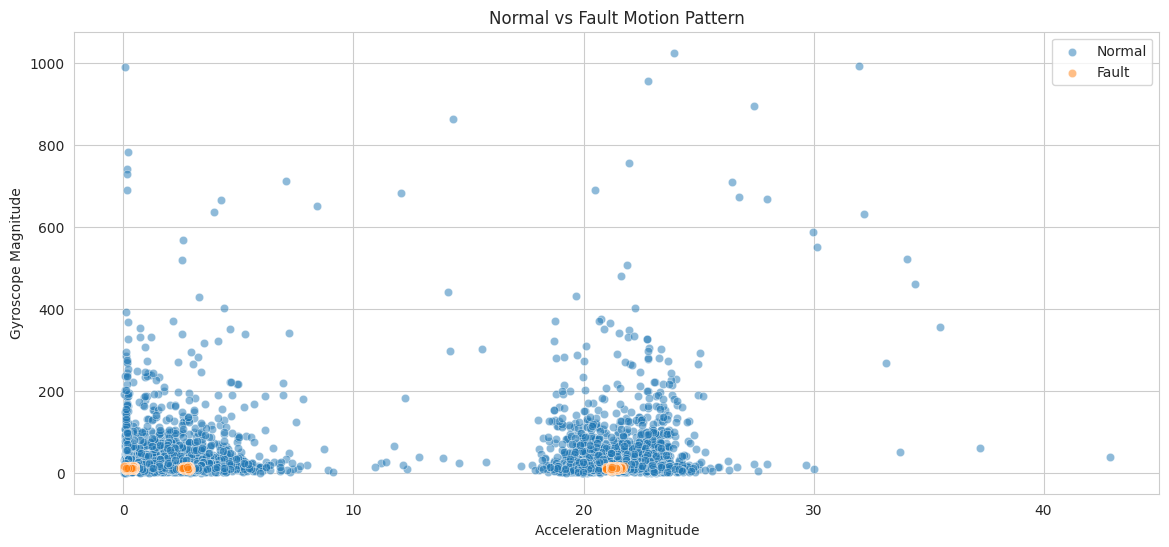

In [102]:
plt.figure()
sns.scatterplot(x=normal_data["acc_mag"], y=normal_data["gyro_mag"], label="Normal", alpha=0.5)
sns.scatterplot(x=fault_data["acc_mag"], y=fault_data["gyro_mag"], label="Fault", alpha=0.5)
plt.xlabel("Acceleration Magnitude")
plt.ylabel("Gyroscope Magnitude")
plt.title("Normal vs Fault Motion Pattern")
plt.legend()
plt.show()

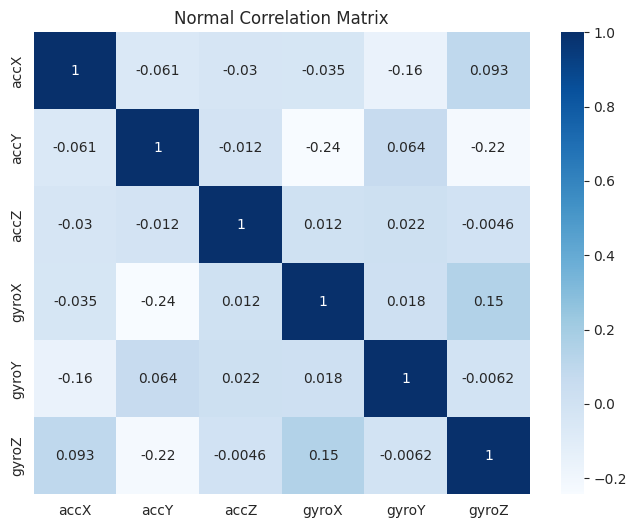

In [103]:
plt.figure(figsize=(8,6))
sns.heatmap(normal_data[features].corr(), annot=True, cmap="Blues")
plt.title("Normal Correlation Matrix")
plt.show()

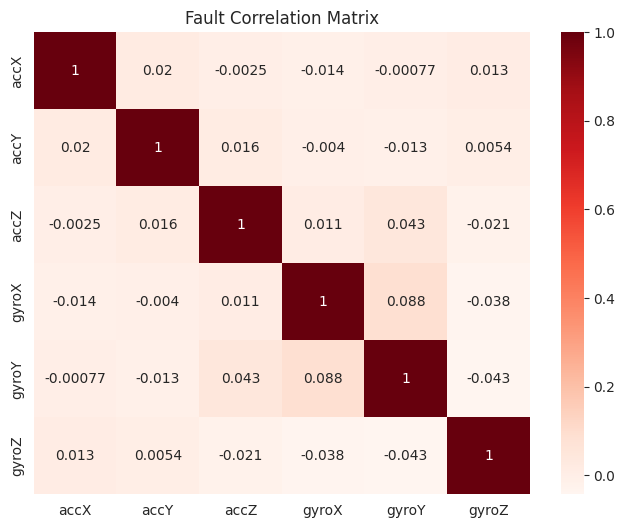

In [104]:
plt.figure(figsize=(8,6))
sns.heatmap(fault_data[features].corr(), annot=True, cmap="Reds")
plt.title("Fault Correlation Matrix")
plt.show()

In [105]:
ei_normal = normal_data_copy
ei_fault  = fault_data_copy

ei_normal.to_csv("ei_normal.csv", index=False)
ei_fault.to_csv("ei_fault.csv", index=False)

In [106]:
normal_ei = pd.read_csv("/content/ei_normal.csv")
print(normal_ei.shape)

(4000, 7)


In [107]:
normal_ei.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,label
0,3.1316,-0.5746,-0.0910,0.3510,-9.9359,-0.6714,normal
1,4.3718,1.3695,19.3116,-0.5341,7.1826,-0.3662,normal
2,1.6759,2.4565,-0.0479,-1.7395,-61.0521,-3.8452,normal
3,-0.0575,0.4214,-0.0192,-7.6752,-11.3725,0.0000,normal
4,-0.0144,0.1245,18.6987,-14.0228,-21.9069,-13.8702,normal


In [108]:
fault_ei = pd.read_csv("/content/ei_fault.csv")
print(fault_ei.shape)

(4000, 7)
